In [1]:
!pwd

/panda/eedy/chile/s1_d156/mintpy_gim_ion_upsample/geo


view.py geo_velocity.h5 velocity --show-gnss --gnss-comp enu2los -v -2 2 --lalo-label --lalo-step 1 --ylabel-rot 90 --figsize 20 16 --save --noverbose --ref-gnss CBAA -m geo_maskTempCoh.h5 --title geo_velocity_SET_ERA5_demErr_ion-GIM
load 22007 GNSS sites with fields: site lat lon start_date end_date num_solution
keep sites within SNWE of (-28.33527897357439, -19.605167126396154, -71.32044600400606, -66.41518791139421): [75]
keep sites with end_date >= 20150402: [69]
keep sites with start_date <= 20240321: [69]
keep sites with # of solutions >= 50: [69]
['AEDA' 'ALUM' 'AMDE' 'ANTF' 'BIN3' 'BLOV' 'BMWS' 'BN01' 'BN02' 'BN03'
 'BN81' 'BN91' 'CBAA' 'CDLC' 'CGTC' 'CGU2' 'CGUA' 'CHMZ' 'CIFU' 'CJNT'
 'CLLA' 'COLO' 'COPO' 'CRIS' 'CRSC' 'CTLR' 'ELOA' 'FBAQ' 'FMCO' 'GTA1'
 'HMBS' 'INCA' 'IQQE' 'JRGN' 'LCEN' 'LLCH' 'LLST' 'MCL1' 'MRCG' 'PAPO'
 'PATH' 'PAZU' 'PB01' 'PB03' 'PB04' 'PB05' 'PB06' 'PB07' 'PB08' 'PB09'
 'PB11' 'PB19' 'PCHA' 'PICC' 'PMEJ' 'PRNL' 'RAD1' 'SOCM' 'SPAT' 'SRGD'
 'TAM3' 'TGTA'

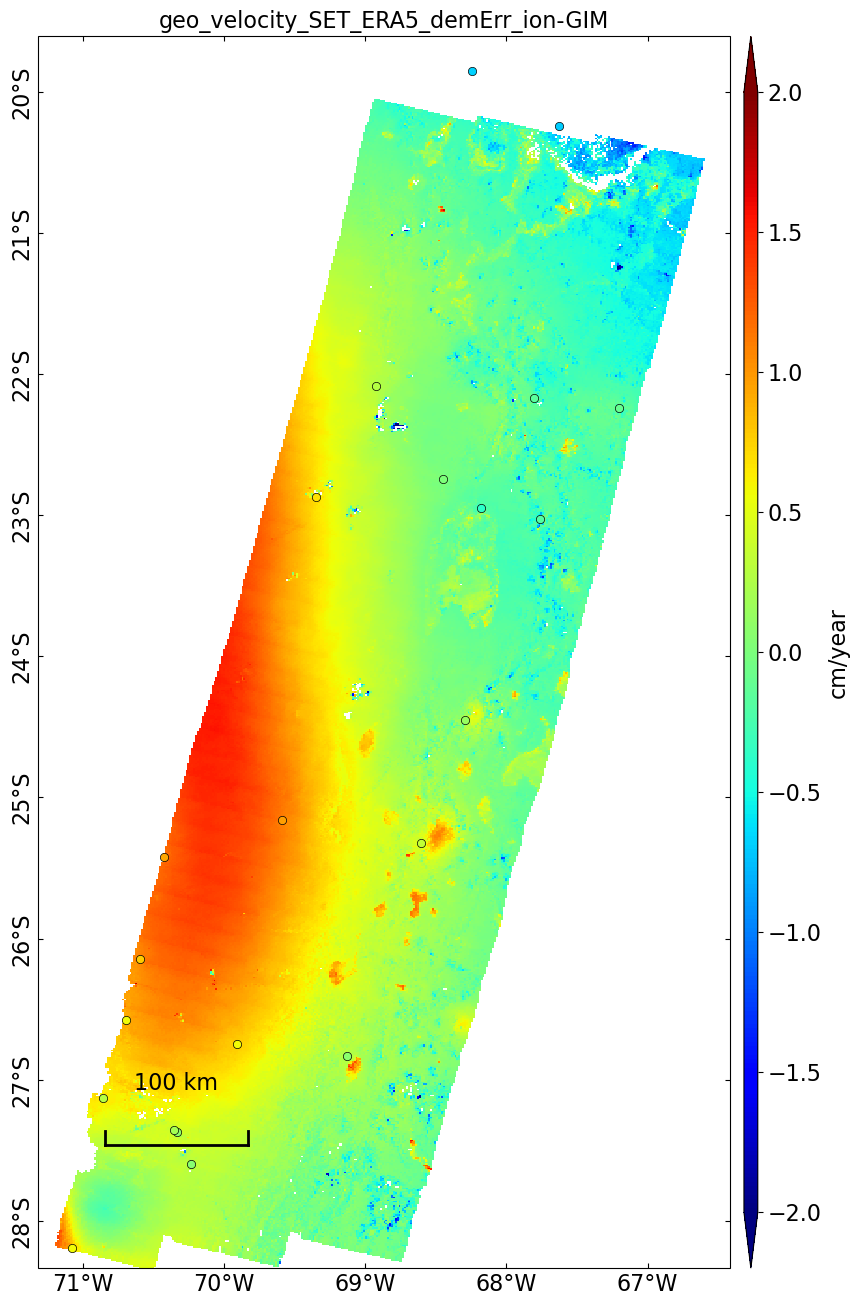

In [4]:
from mintpy.cli import view, tsview, plot_network, plot_transection
opt = '--show-gnss  --gnss-comp enu2los  -v -2 2 --lalo-label --lalo-step 1 --ylabel-rot 90  --figsize 20 16 --save --noverbose --ref-gnss CBAA'
view.main(f' geo_velocity.h5 velocity {opt} -m geo_maskTempCoh.h5 --title geo_velocity_SET_ERA5_demErr_ion-GIM'.split())

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed


read GNSS velocity from file: gnss_enu2los_UNR.csv
read InSAR velocity from file: geo_velocity.h5
[==================================================] 68/68 VLZL    0s /     0s 
median offset between InSAR and GNSS [before common referencing]: -0.36 cm/year
referencing both InSAR and GNSS data to site: CBAA
removing sites with NaN values in GNSS or InSAR
pruning sites with value range: [-0.5, 1.5] cm/yr
GNSS   min/max: -0.38 / 0.96
InSAR min/max: -0.32 / 1.13
RMSE = 0.21 cm/yr
R^2 = 0.95
Preliminary outliers detection: abs(InSAR - GNSS) > med abs dev (0.27) * 5
Site:  InSAR  GNSS
save figure to file insar_vs_gnss_scatter.pdf


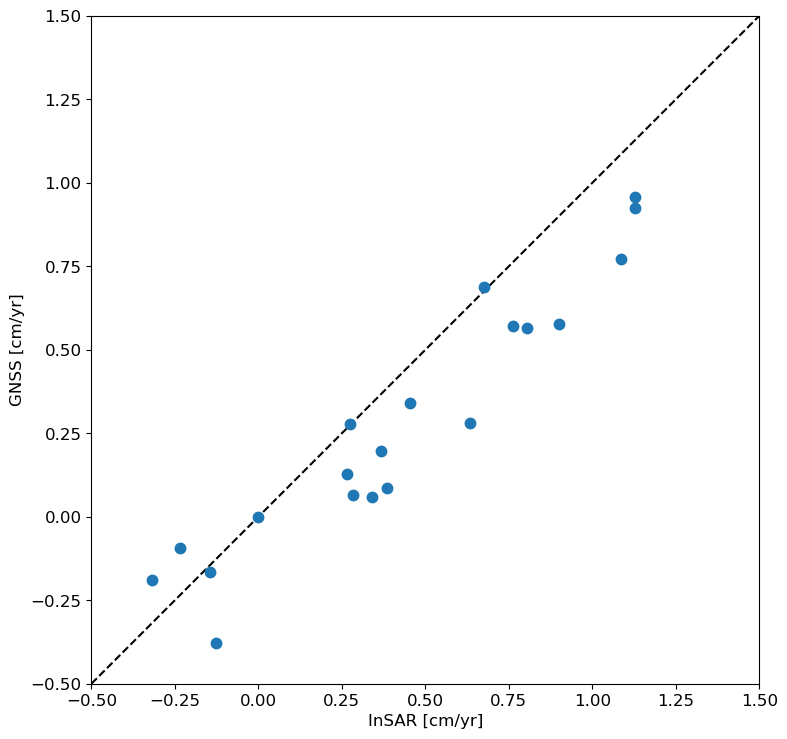

In [3]:
from mintpy.utils import readfile, utils as ut, plot as pp
kwargs = dict(ref_gnss_site='CBAA', csv_file='gnss_enu2los_UNR.csv',msk_file='geo_maskTempCoh.h5' , fig_size = (8,8) ,vlim = [-0.5 , 1.5])
kwargs['ex_gnss_sites'] = ['PCHA']
sites, insar_obs, gnss_obs = pp.plot_insar_vs_gnss_scatter(vel_file='geo_velocity.h5', **kwargs)